In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [2]:
def compute_similarity_q(network_state, memory):
    return np.mean(network_state * memory)

def generate_memories(
        P: int, # number of memories to generate
        network_size: int # number of units in the network
):
    p = 0.5 # memories are random -1, 1 sequences
    memories = np.zeros(shape=(P, network_size))
    for idx in range(P):
        memories[idx, :] = np.random.binomial(n=1, p=p, size=network_size)
    memories[memories == 0] = -1
    return memories

def compute_synaptic_weights(memories):
    network_size = memories.shape[1]
    # computing synaptic connections matrix
    M = np.zeros(shape=(network_size, network_size))
    for i in range(network_size):
        for j in range(network_size):
            if i != j:
                M[i, j] = np.sum(memories[:, i] * memories[:, j])
    return M

def get_initial_state(target_memory, q_0=0.2):
    init_state = np.zeros_like(target_memory)
    for i in range(len(target_memory)):
        # generating random number
        if np.random.random() < q_0:
            init_state[i] = target_memory[i]
        else:
            init_state[i] = np.random.binomial(n=1, p=0.5, size=1)
    init_state[init_state == 0] = -1
    return init_state

def simulate_memory_recovery(initial_state, target_memory, synaptic_weights, simulation_length):
    """
    return similarity dynamics of recovering a target memory from a given initial state
    """
    similarity_dynamics = np.zeros(simulation_length + 1)
    similarity_dynamics[0] = compute_similarity_q(initial_state, target_memory)
    state = initial_state
    for idx in range(simulation_length):
        state = np.where(synaptic_weights @ state > 0, 1, -1)
        similarity_dynamics[idx + 1] = compute_similarity_q(state, target_memory)
    return similarity_dynamics


def plot_similarity_dynamics(
        target_memory,
        M, # sunaptic weights matrix
        number_of_stored_patterns,
        q_0 = 0.2, # probability for a unit in initial state to be equal to its value in the target memory
        simulation_length = 20, # how many updates to perform
        repeat = 100, # how many different initialisations to simulate
        save_plot = False,
        ):
        fig, axs = plt.subplots(1, 2, figsize=(10, 3), tight_layout=True)
        eps = 0.05
        q_final = np.zeros(repeat)
        for i in range(repeat):
            initial_state = get_initial_state(target_memory, q_0=q_0)
            similarity_dynamics = simulate_memory_recovery(initial_state, target_memory, M, simulation_length)
            q_final[i] = similarity_dynamics[-1]
            axs[0].plot(np.arange(len(similarity_dynamics)), similarity_dynamics, c='k', alpha=0.25)
            axs[0].scatter(np.arange(len(similarity_dynamics)), similarity_dynamics, s= 20, c='k', alpha=0.25)
        axs[0].set_xticks(np.arange(len(similarity_dynamics))[::2])
        axs[0].set_ylim([-1 - eps, 1 + eps])
        axs[0].set_ylabel('Similarity $q(t)$', fontsize=15)
        axs[0].set_xlabel('Time step $t$', fontsize=15)
        axs[0].spines[['right', 'top']].set_visible(False)
        axs[0].tick_params(axis='both', which='major', labelsize=12)
        axs[0].set_title('Similarity $q(t)$ for $q_{0}=$' + str(q_0) + f" (over {repeat} init.)", fontsize=15)
        
        
        axs[1].set_title("Histogram of final states $q(T_{final})$", fontsize=15)
        axs[1].hist(q_final, bins=np.linspace(-1, 1, 21), color='k')
        axs[1].set_ylabel('Counts', fontsize=15)
        axs[1].set_xlabel('Similarity $q(T_{final})$', fontsize=15)
        axs[1].tick_params(axis='both', which='major', labelsize=12)
        axs[1].set_xlim([-1, 1])
        axs[1].set_ylim([0, repeat])
        axs[1].spines[['right', 'top']].set_visible(False)
        fig.suptitle(f'# of stored patterns P={number_of_stored_patterns}', fontsize=15)
        if save_plot:
            output_dir = './plots/'
            os.makedirs(output_dir, exist_ok=True)
            plt.savefig(os.path.join(output_dir, f'q_0_{q_0}_P_{number_of_stored_patterns}.png'))
        plt.show()


In [3]:
# fixing the seed for results reproducability
seed = 1003
np.random.seed(seed)
random.seed(seed)

## Question 1

## P = 1

In [4]:
network_size = 100 # number of units in the Hopfield network
P = 1 # number of stored patterns

In [5]:
memories = generate_memories(P, network_size)

In [6]:
memories

array([[ 1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
        -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
        -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
        -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,
        -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,
         1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
         1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.]])

In [7]:
M = compute_synaptic_weights(memories)

In [8]:
repeat = 100 # we will recover the first memory from `repeat` initial conditions
simulation_length = 20 # number of synchronous updates performed

In [9]:
target_memory = memories[0, :] 

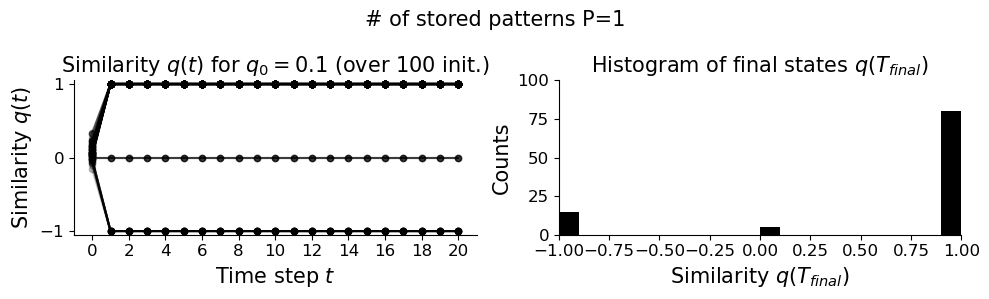

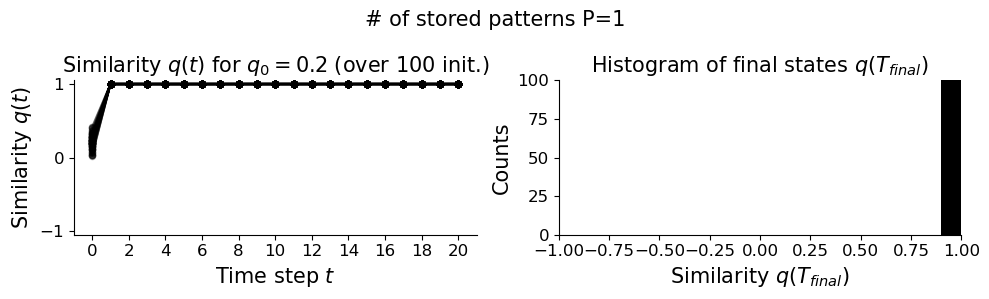

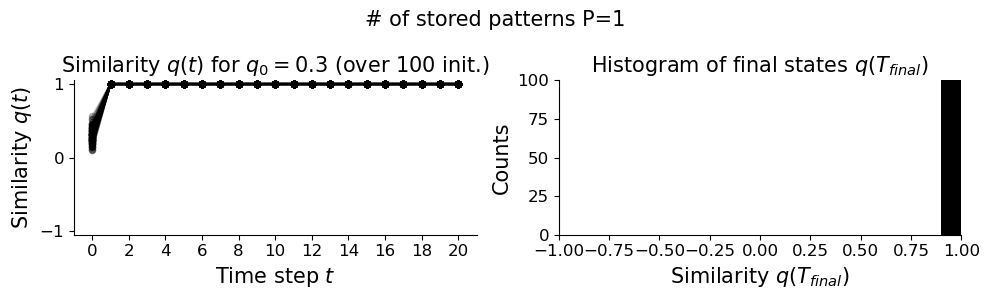

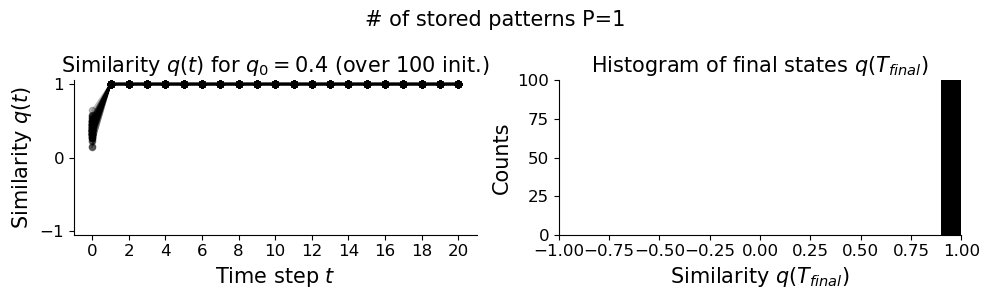

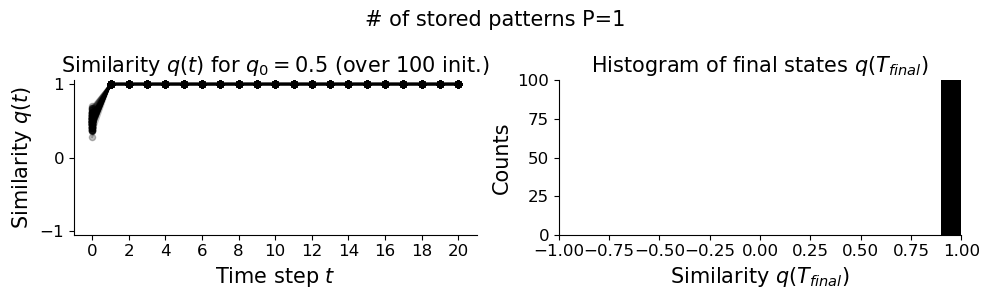

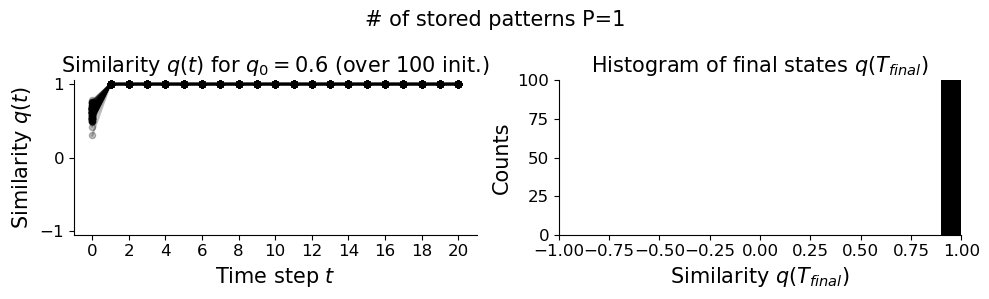

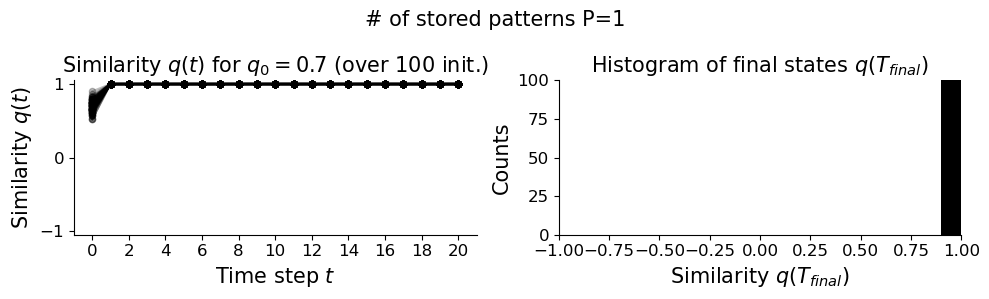

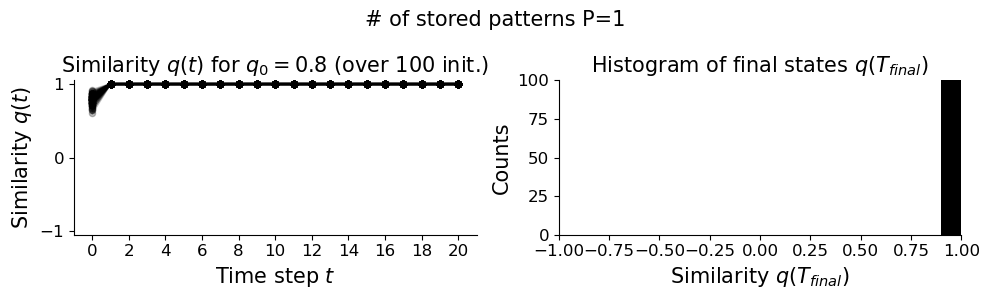

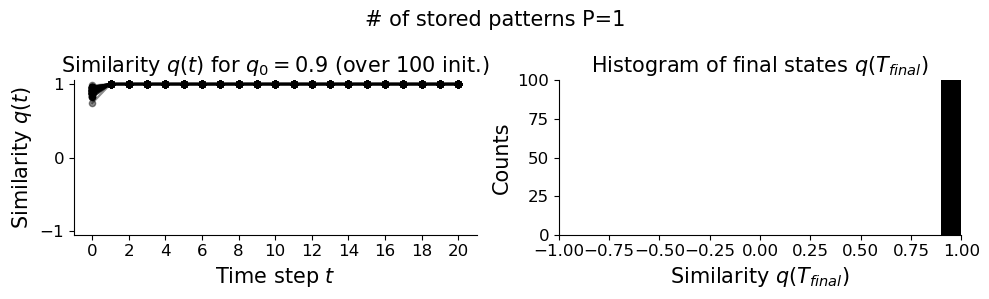

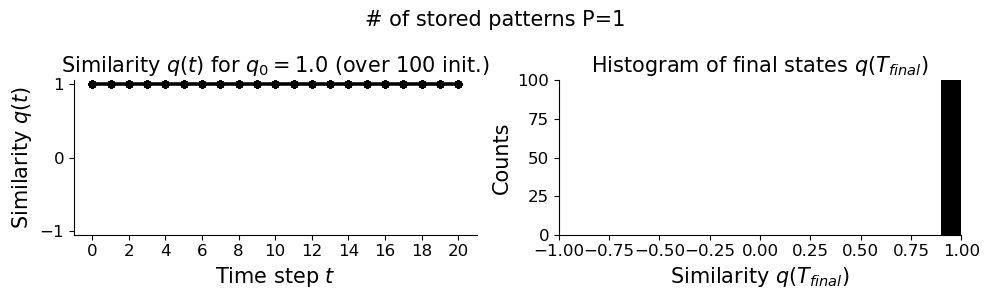

In [10]:
for q_0 in np.linspace(0.1, 1, 10):
    plot_similarity_dynamics(
    target_memory=target_memory,
    M = M,
    number_of_stored_patterns=P,
    q_0 = np.round(q_0, 1),
    simulation_length=simulation_length,
    repeat=repeat, 
    save_plot=True
)

## P = 5

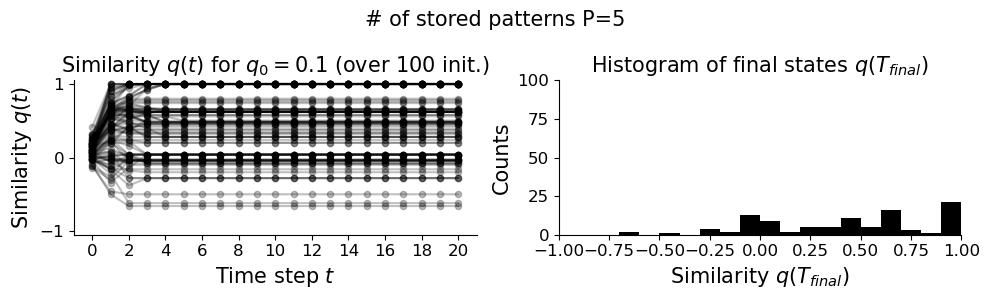

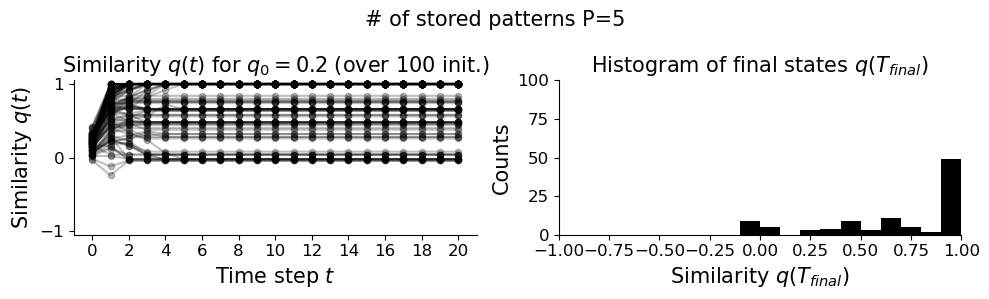

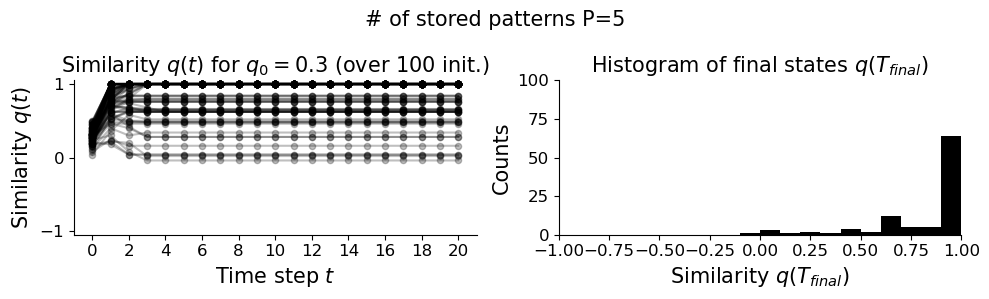

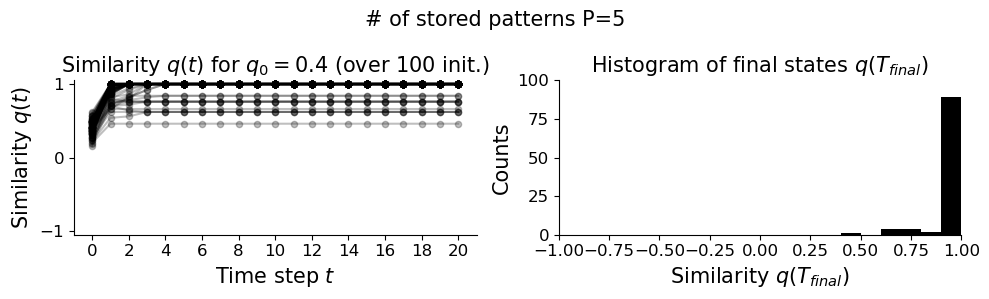

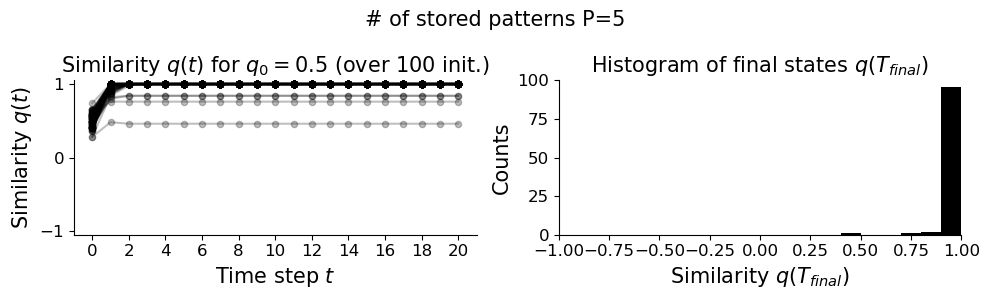

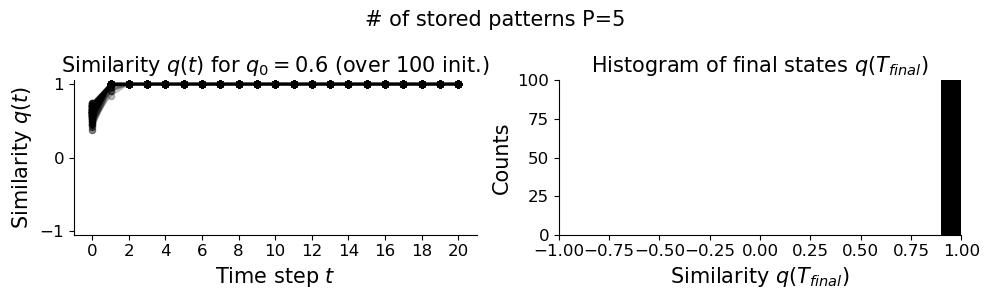

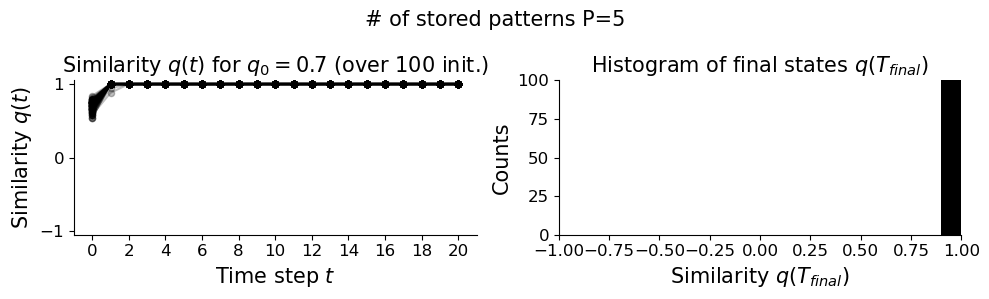

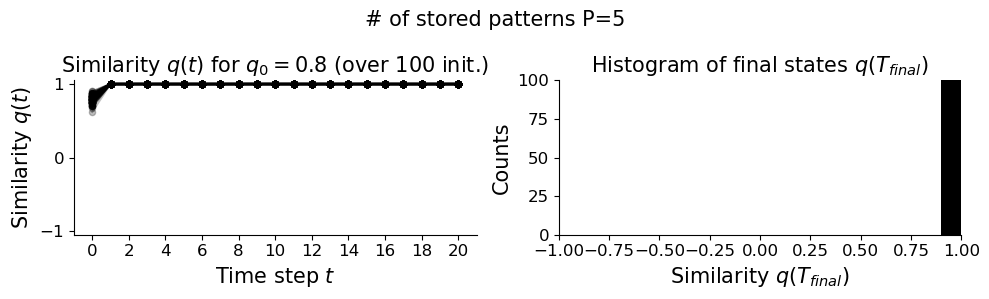

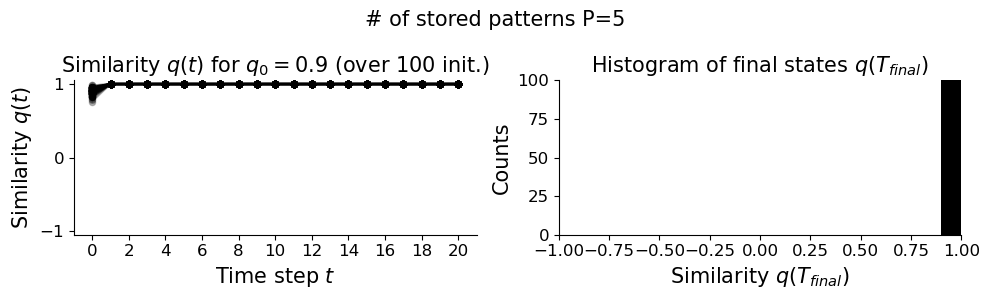

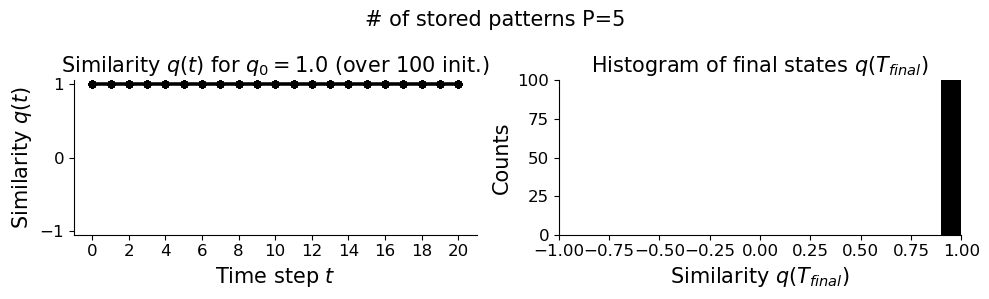

In [11]:
P = 5  # number of stored patterns
memories = generate_memories(P, network_size)
M = compute_synaptic_weights(memories)
repeat = 100  # we will recover the first memory from `repeat` initial conditions
simulation_length = 20  # number of synchronous updates performed
target_memory = memories[0, :]
for q_0 in np.linspace(0.1, 1, 10):
    plot_similarity_dynamics(
        target_memory=target_memory,
        M=M,
        number_of_stored_patterns=P,
        q_0=np.round(q_0, 1),
        simulation_length=simulation_length,
        repeat=repeat, 
        save_plot=True
    )

## P = 10

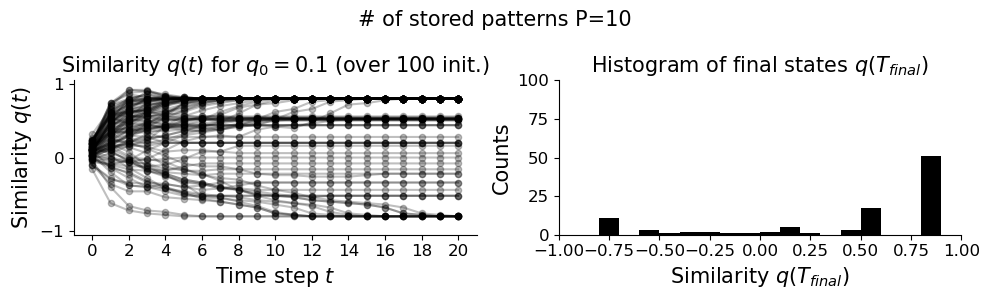

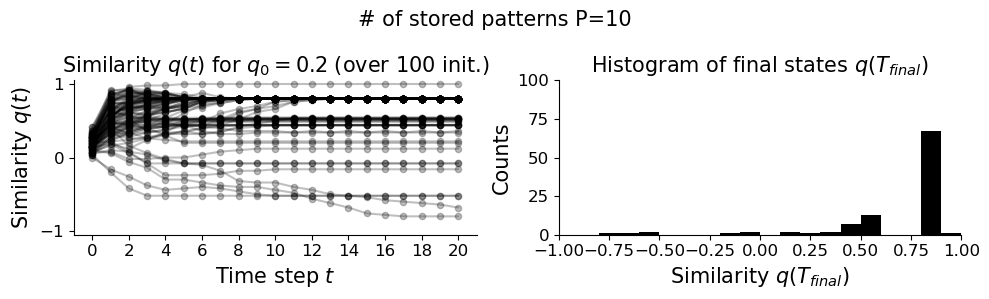

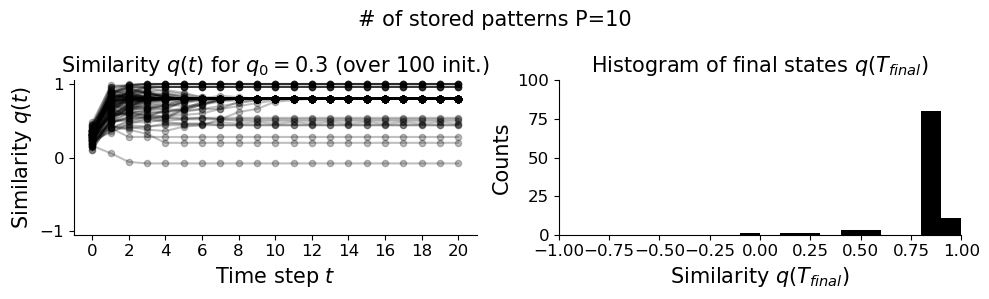

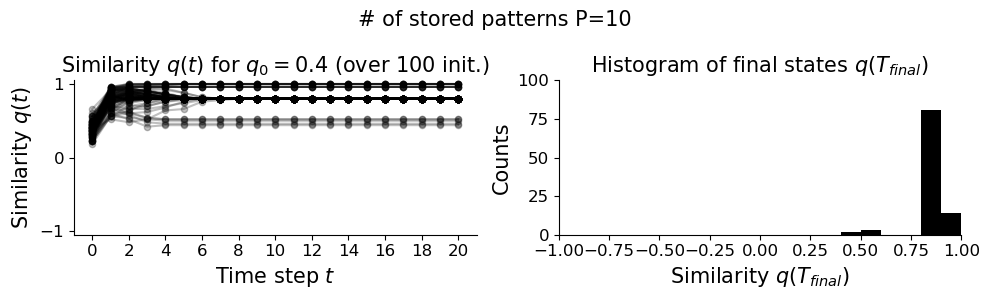

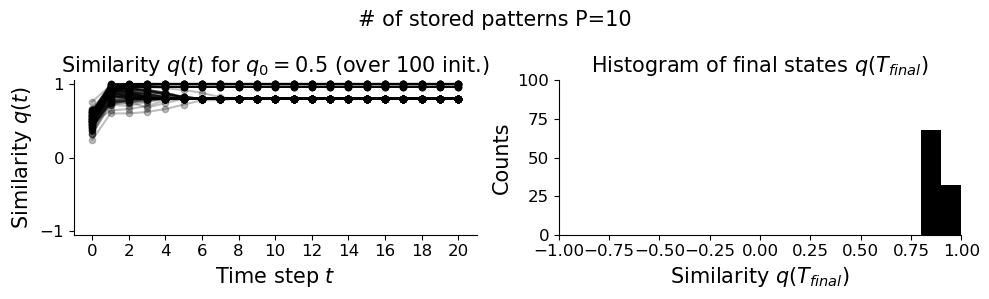

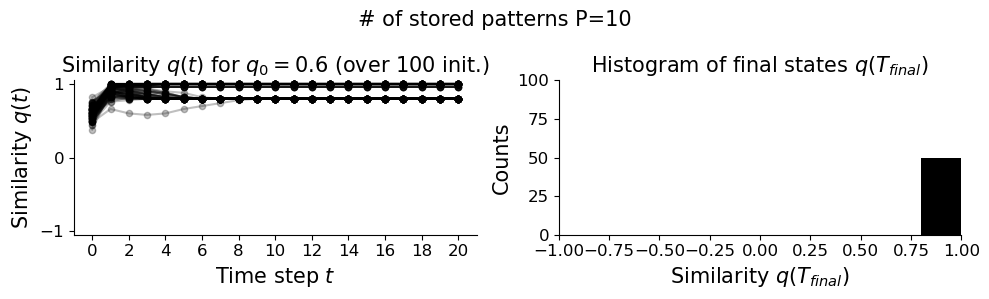

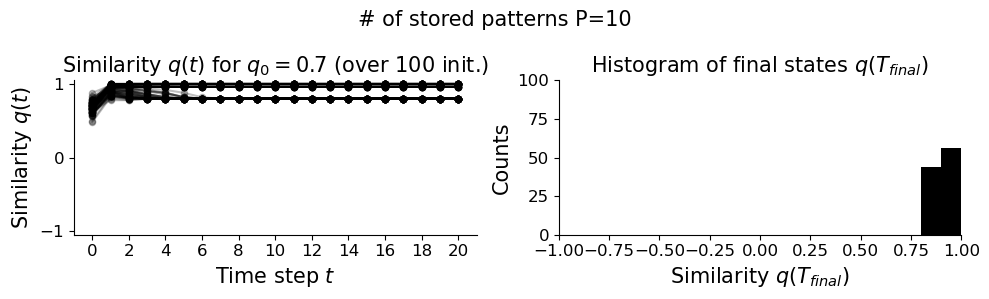

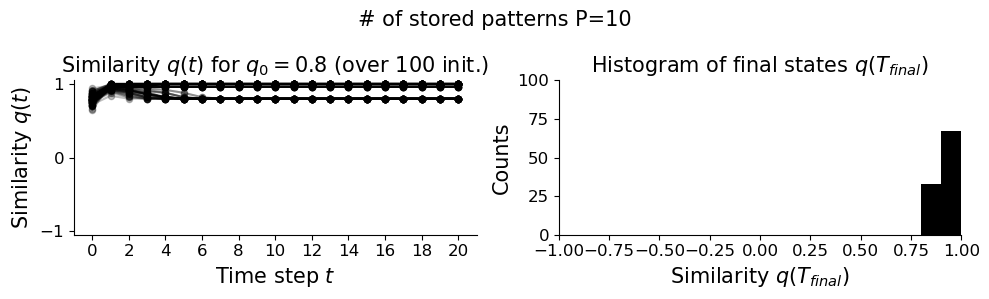

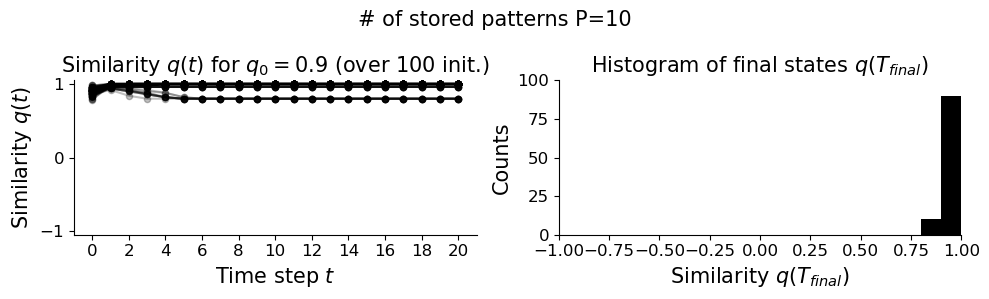

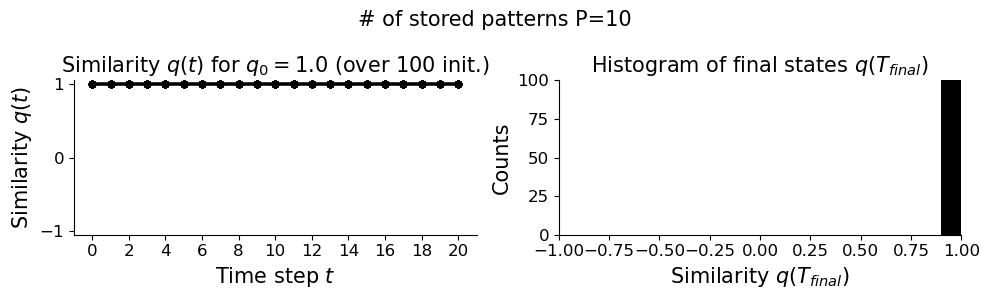

In [12]:
P = 10  # number of stored patterns
memories = generate_memories(P, network_size)
M = compute_synaptic_weights(memories)
repeat = 100  # we will recover the first memory from `repeat` initial conditions
simulation_length = 20  # number of synchronous updates performed
target_memory = memories[0, :]
for q_0 in np.linspace(0.1, 1, 10):
    plot_similarity_dynamics(
        target_memory=target_memory,
        M=M,
        number_of_stored_patterns=P,
        q_0=np.round(q_0, 1),
        simulation_length=simulation_length,
        repeat=repeat, 
        save_plot=True
    )

## Question 2

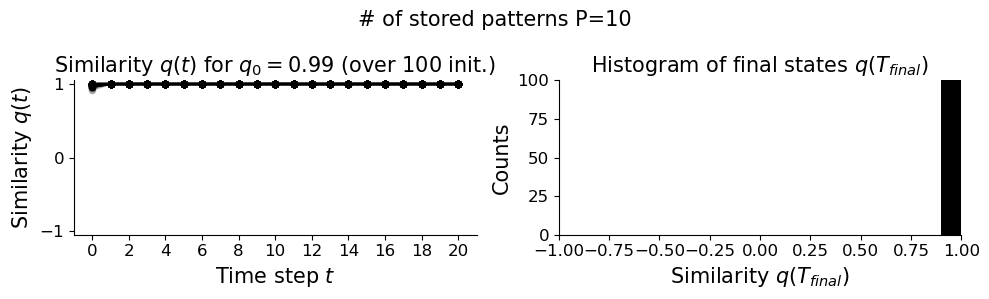

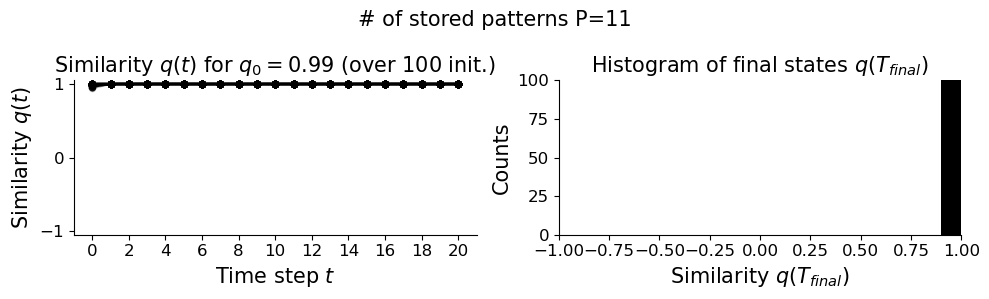

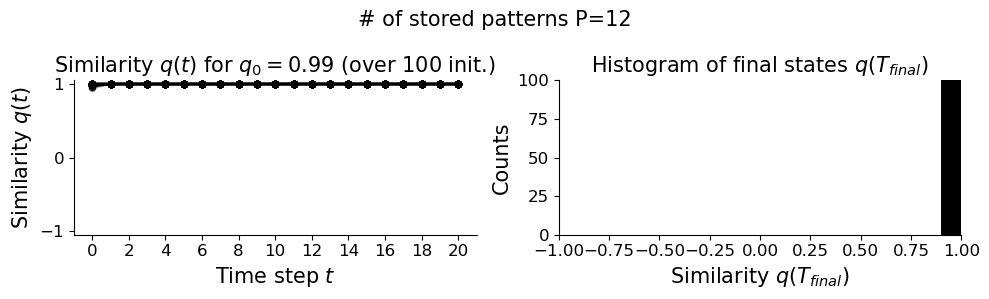

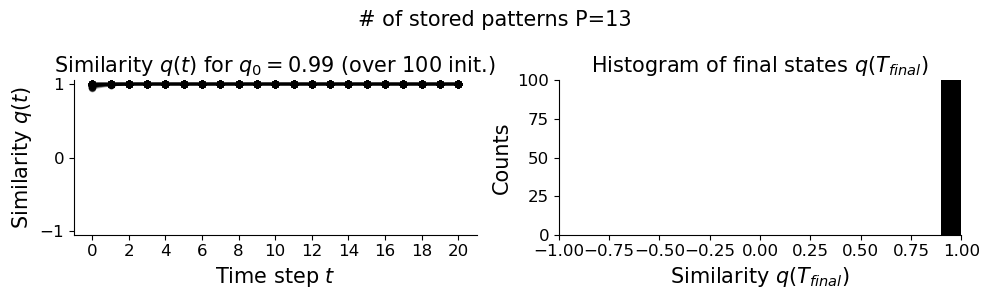

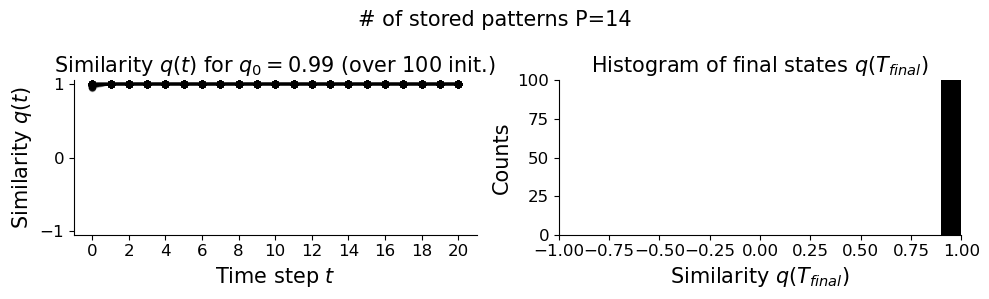

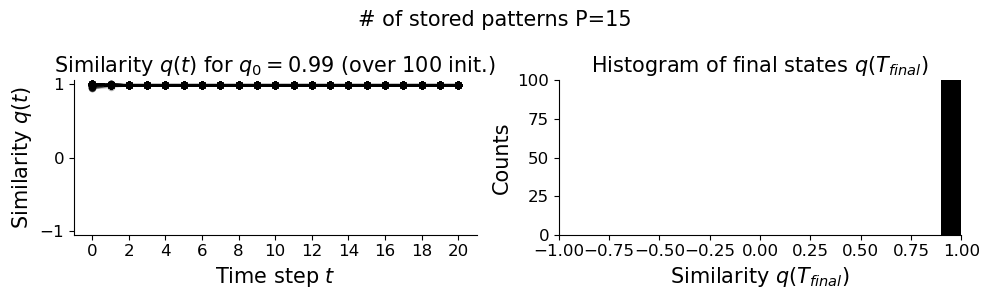

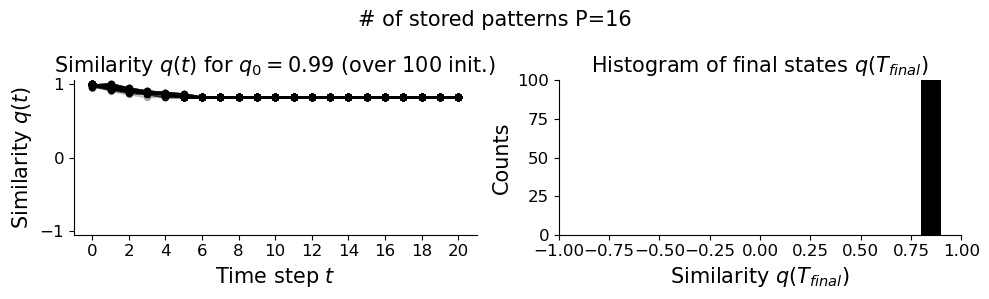

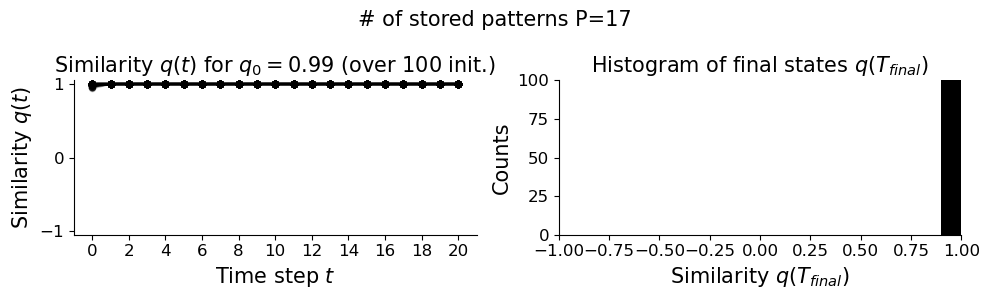

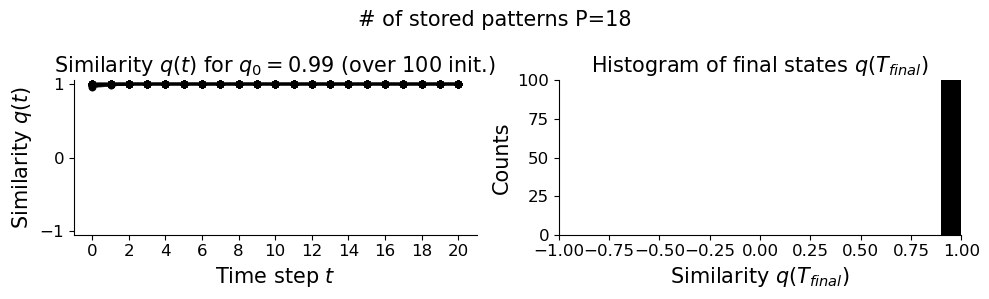

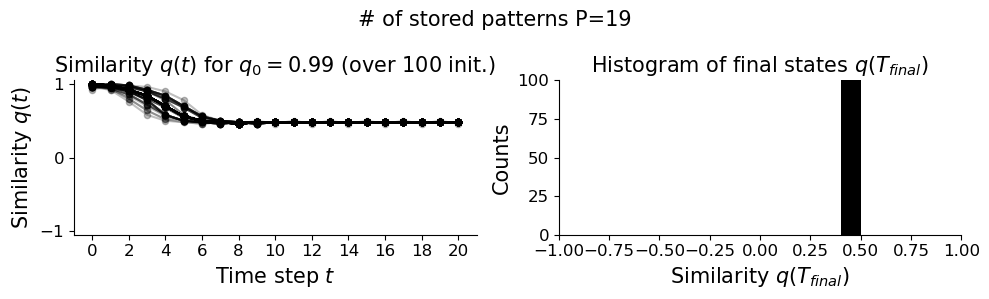

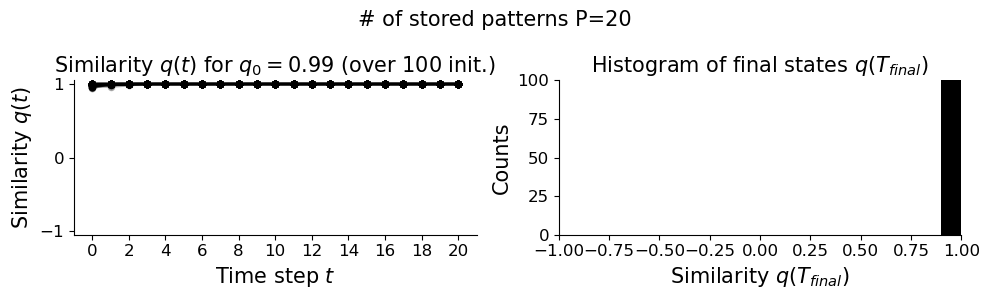

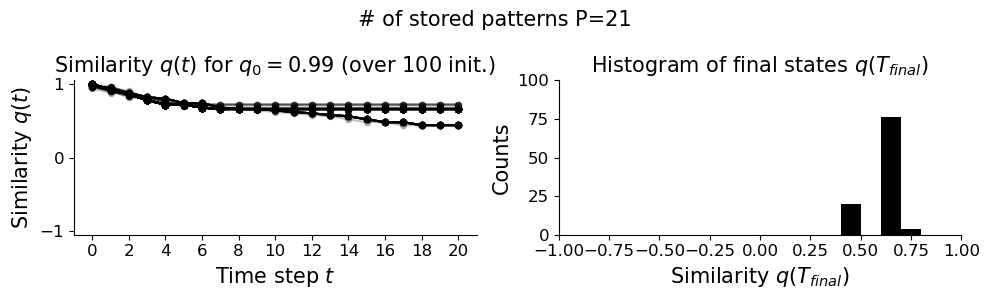

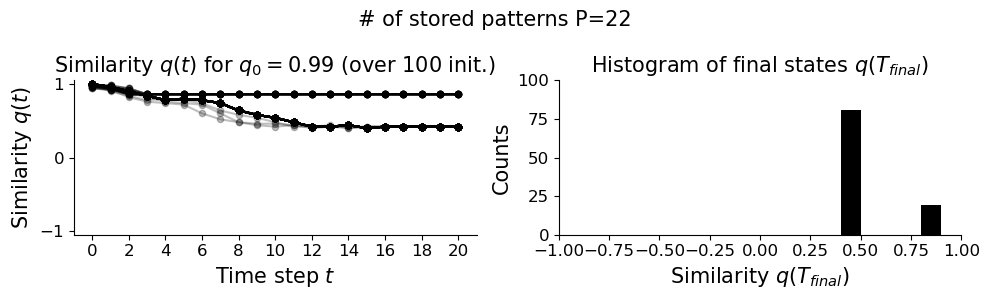

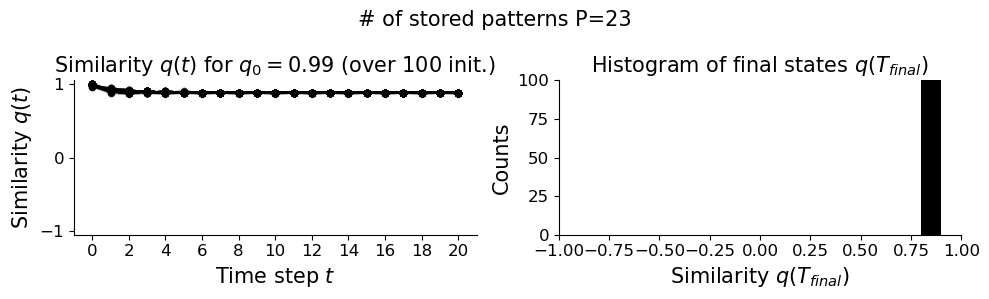

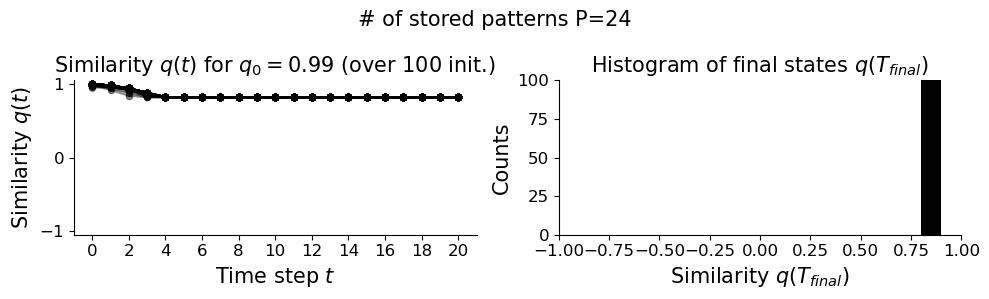

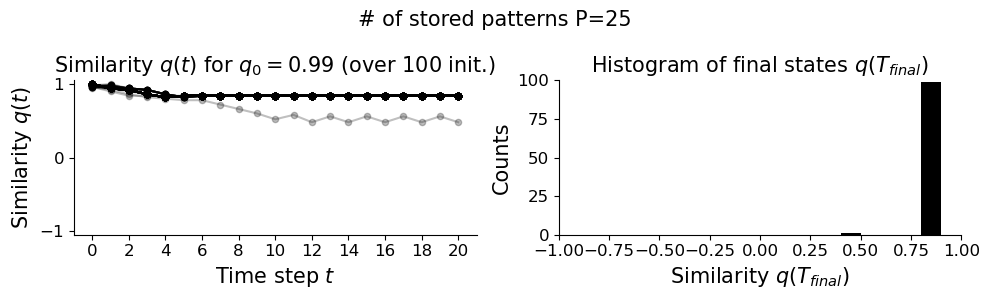

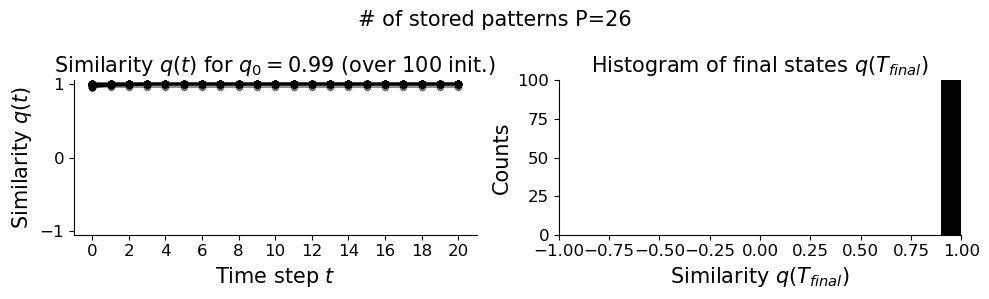

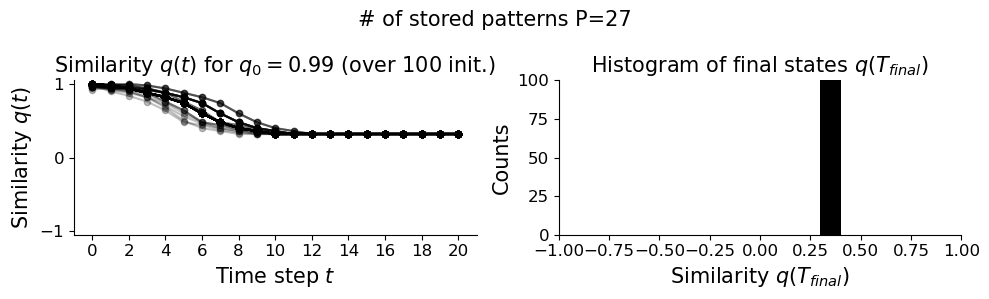

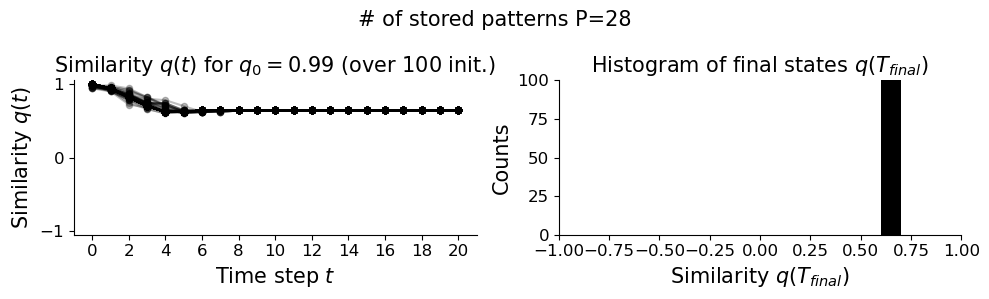

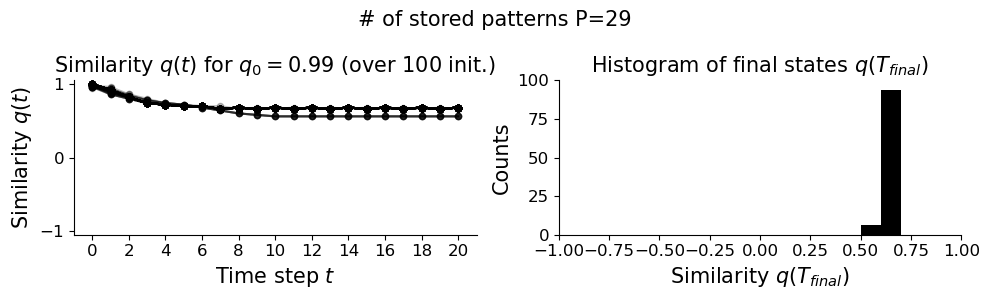

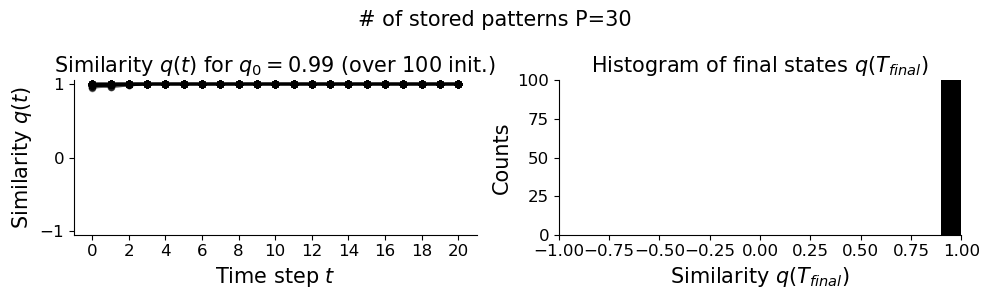

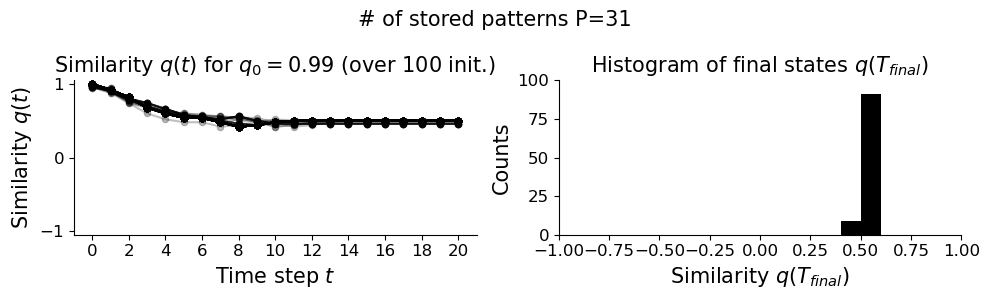

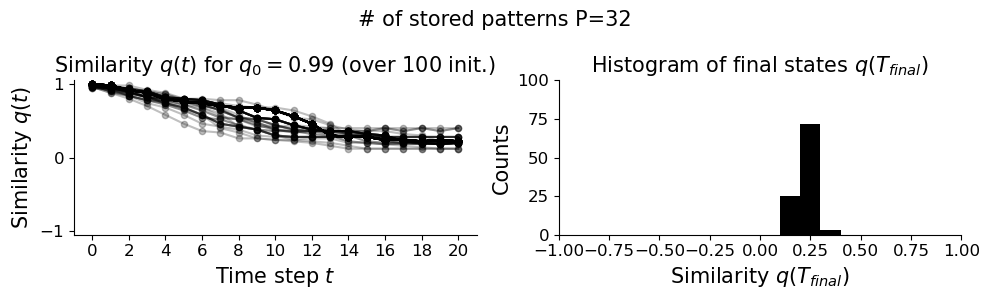

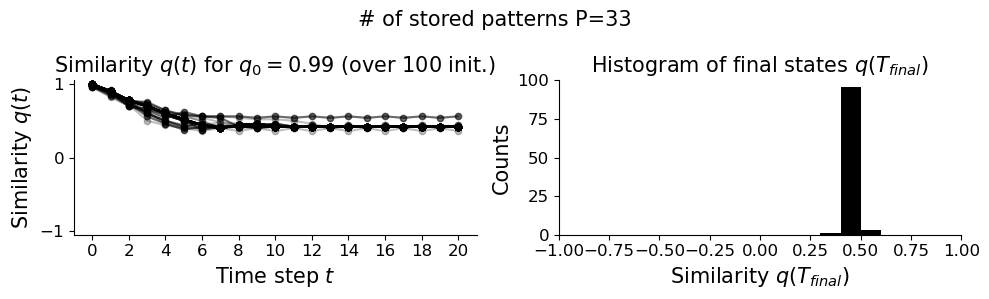

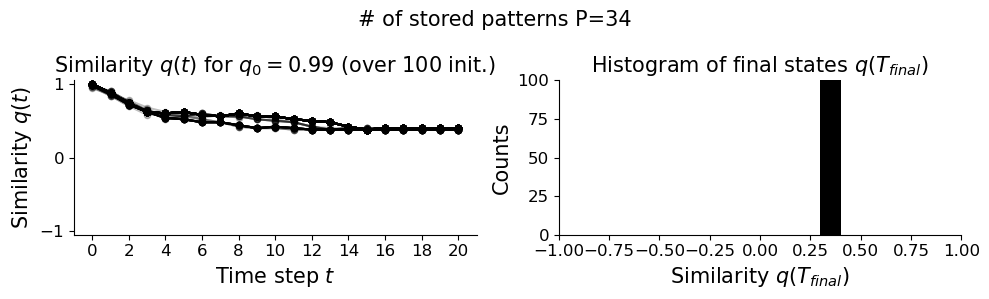

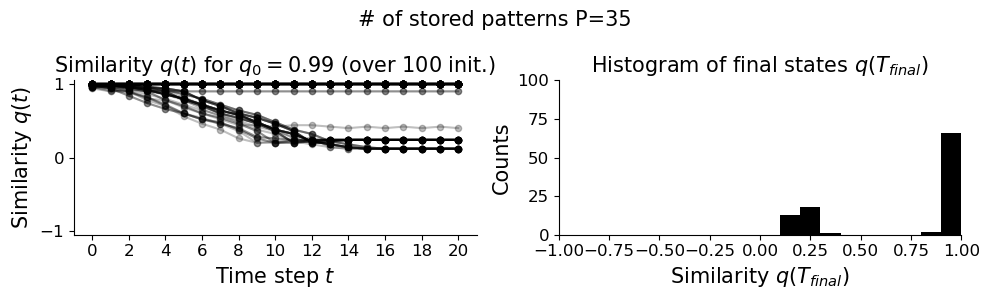

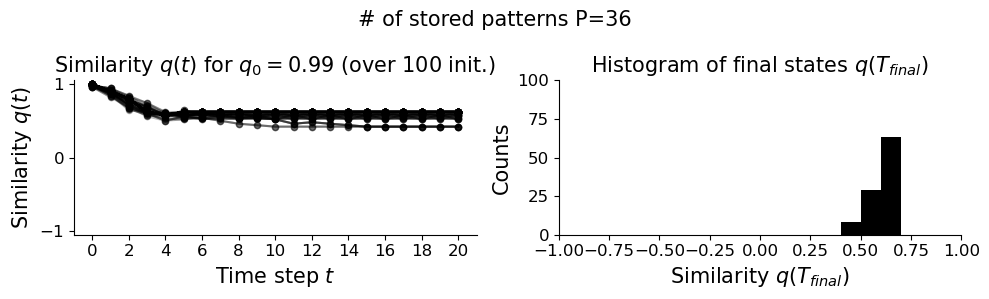

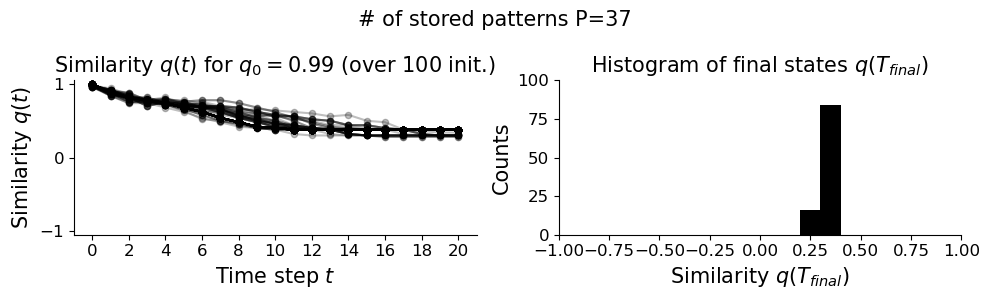

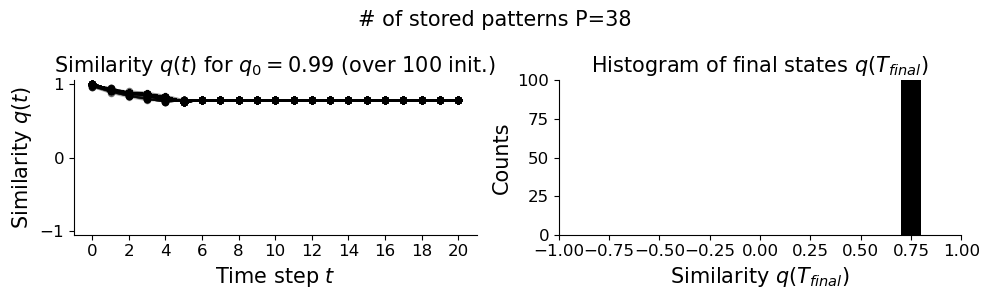

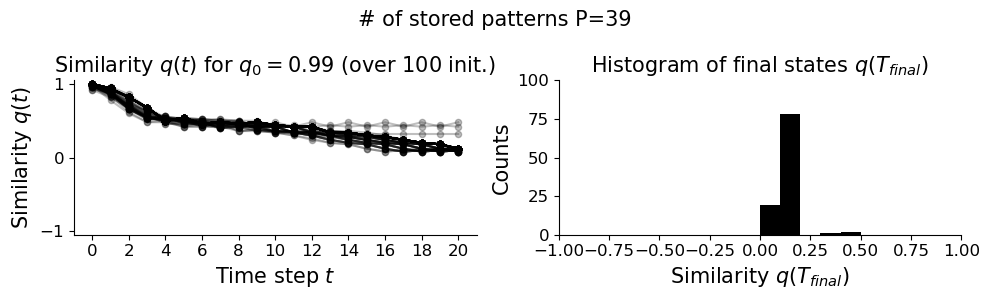

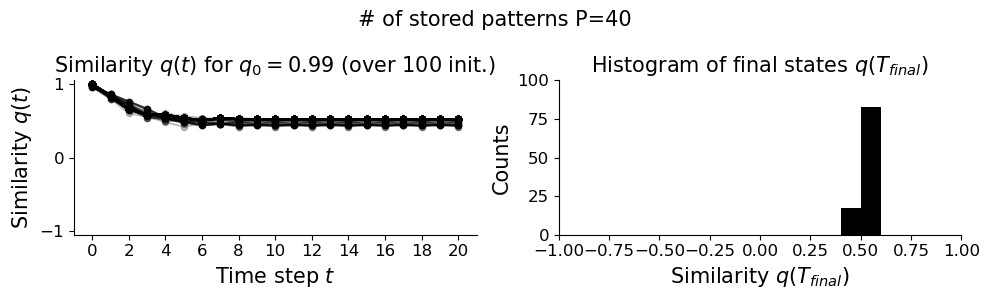

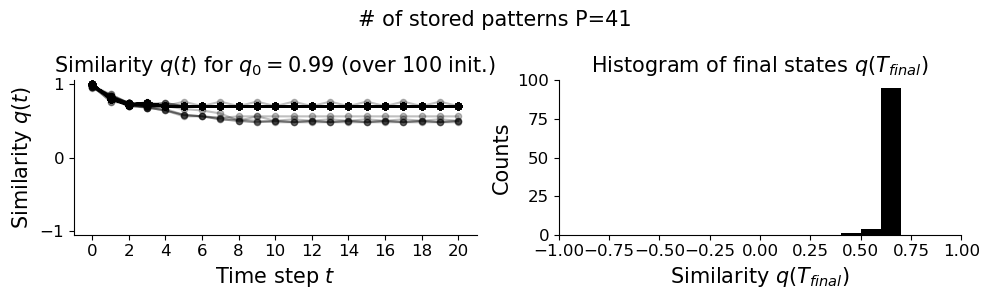

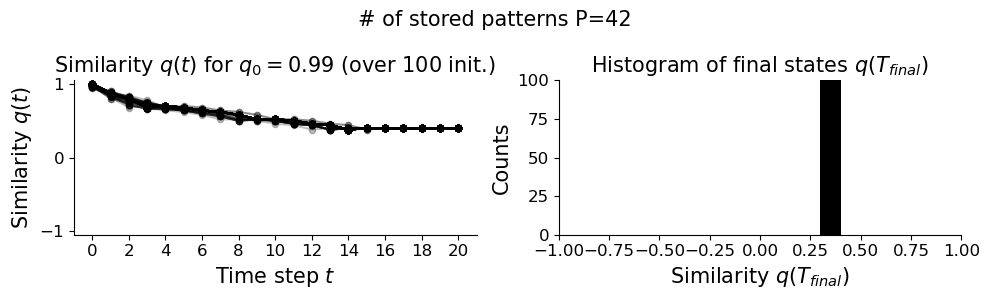

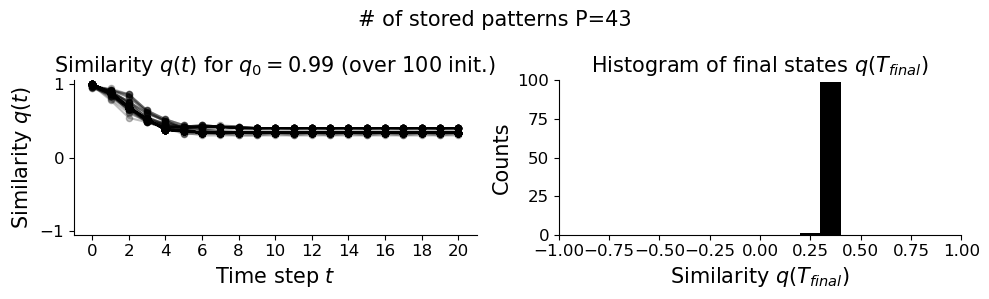

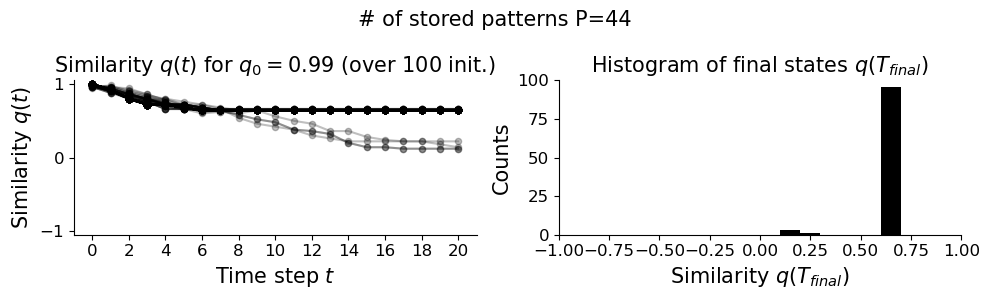

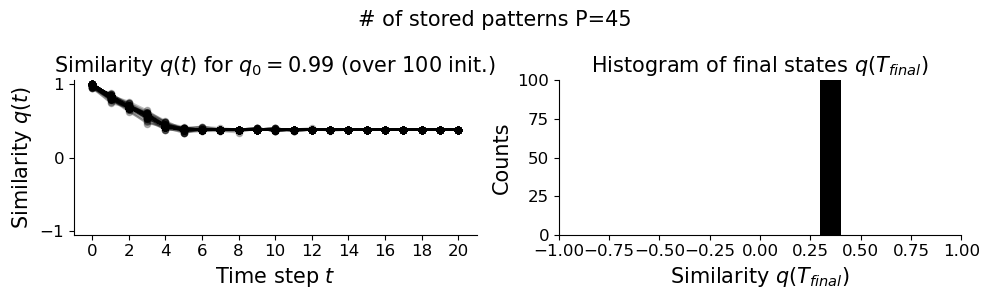

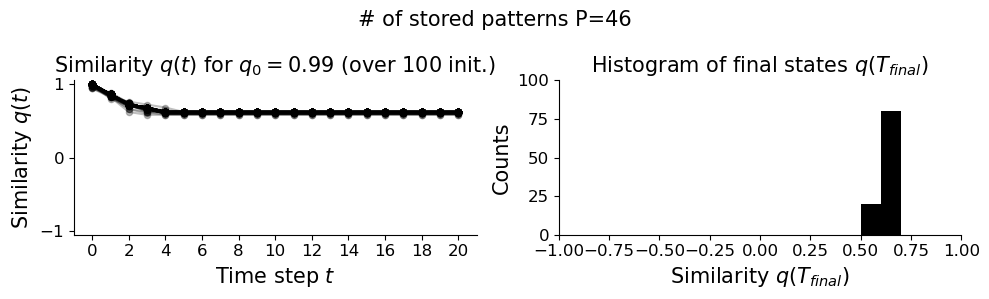

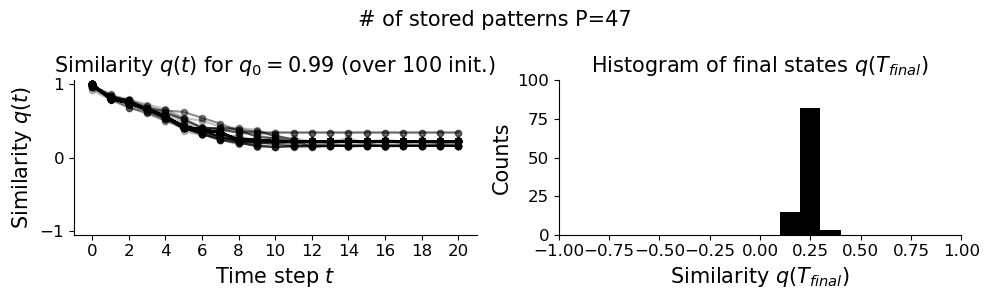

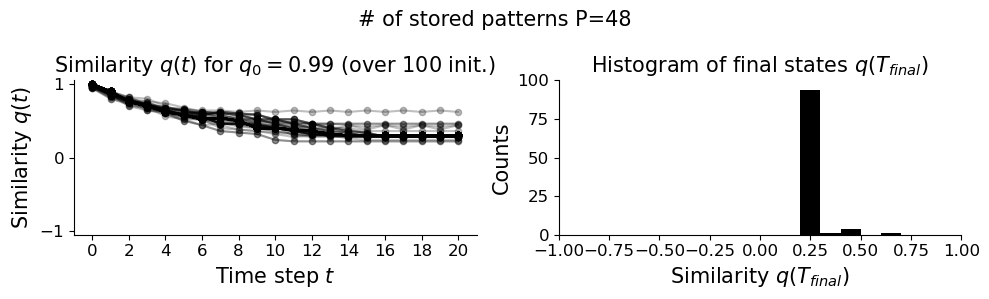

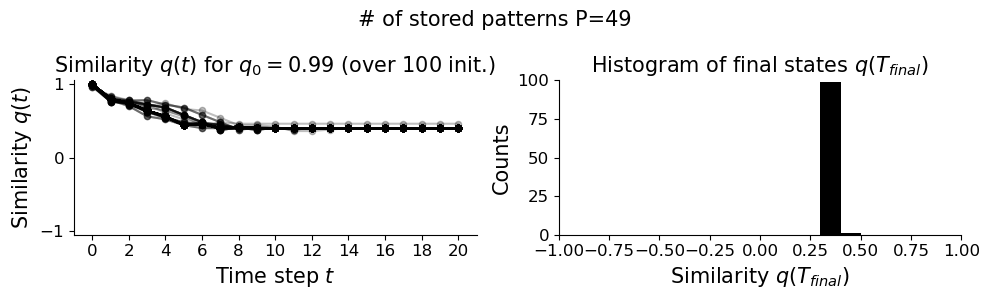

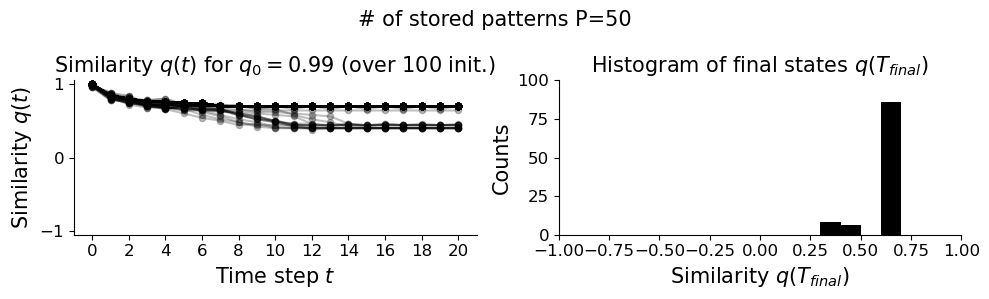

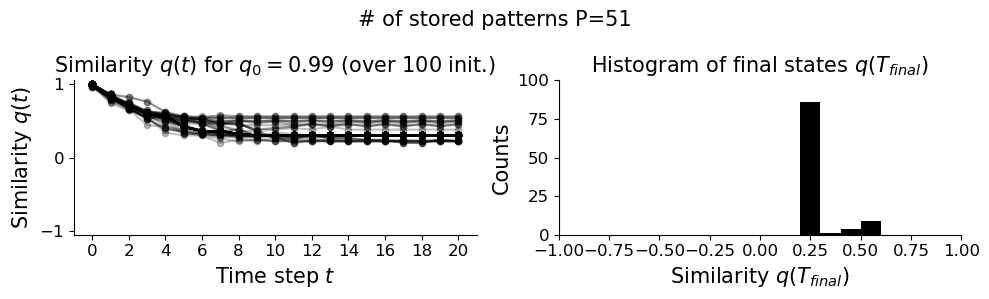

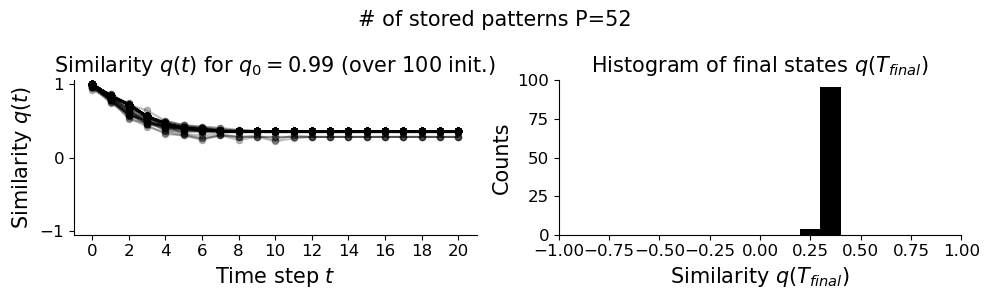

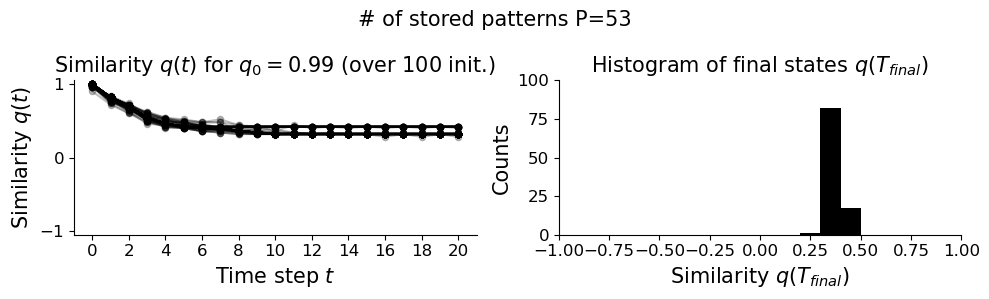

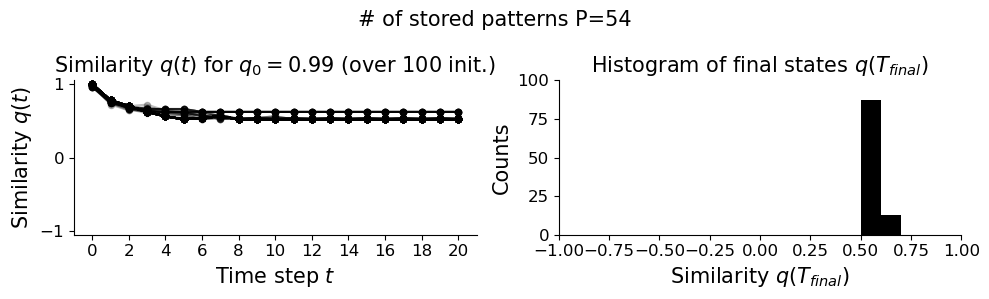

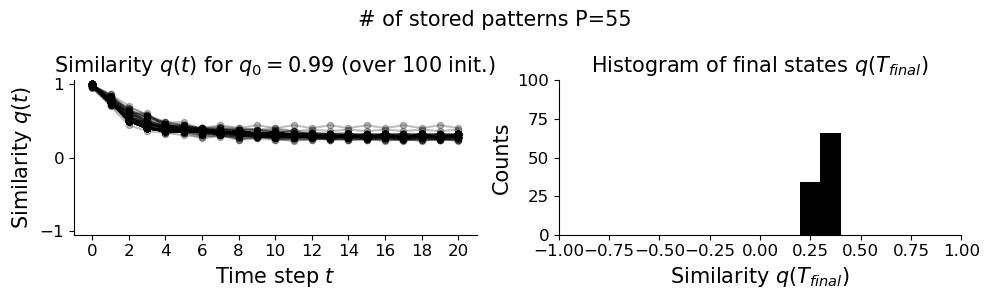

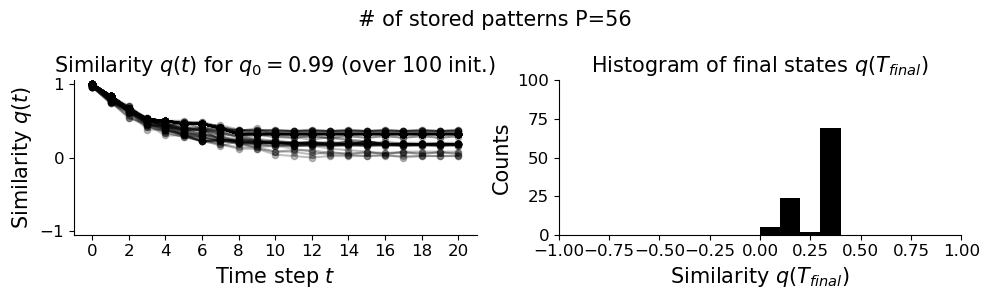

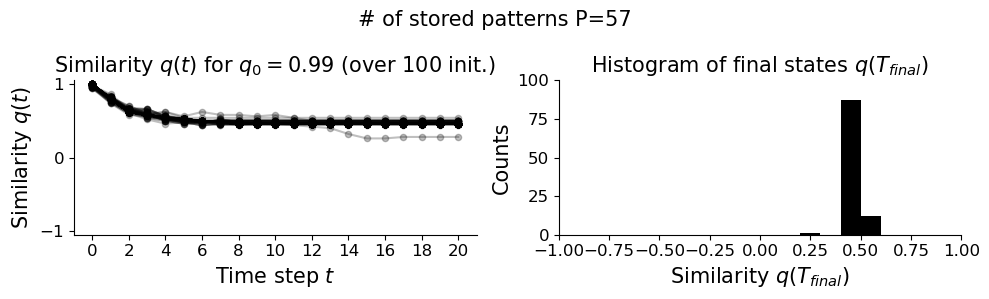

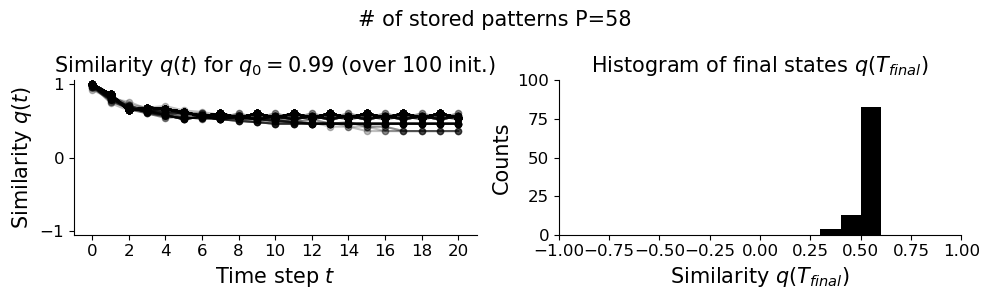

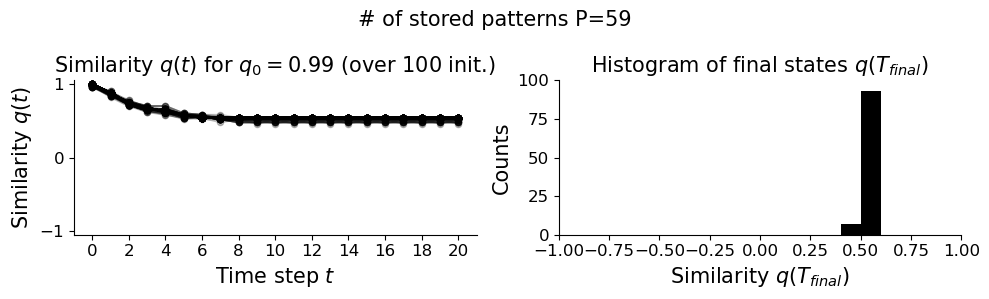

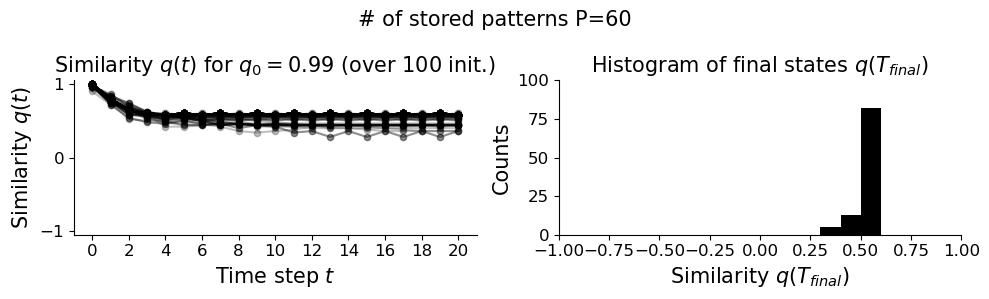

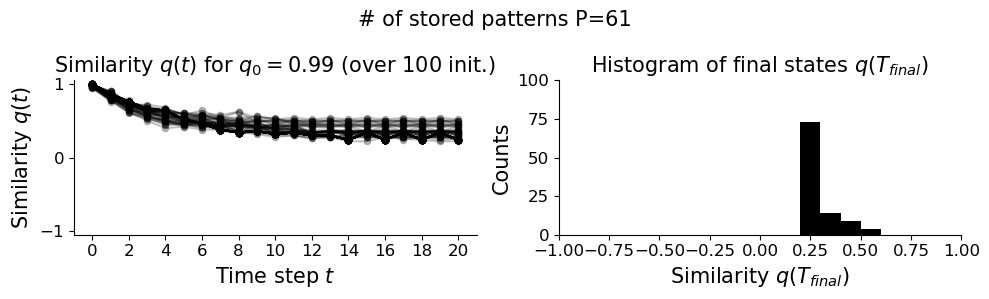

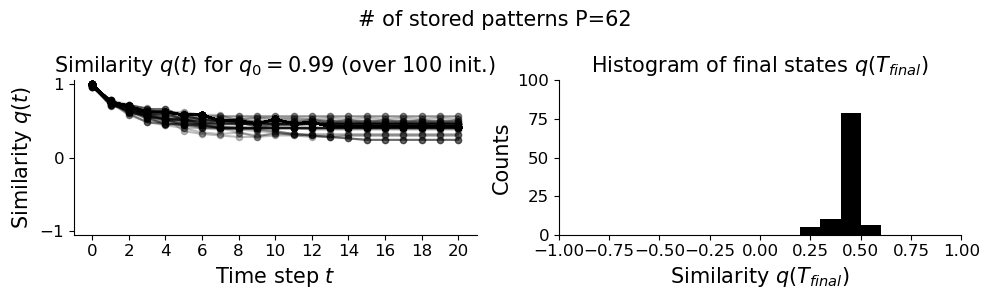

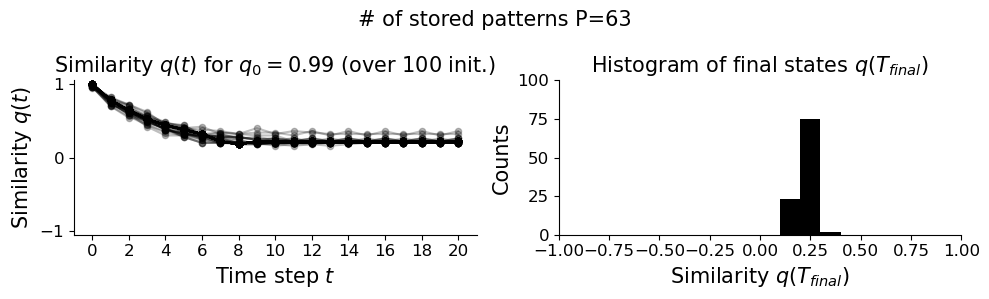

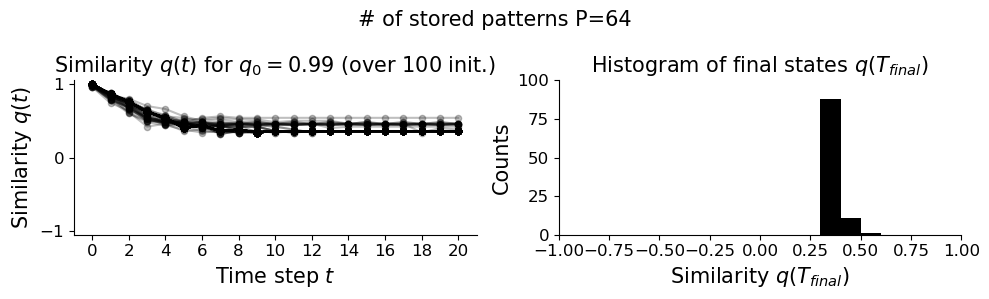

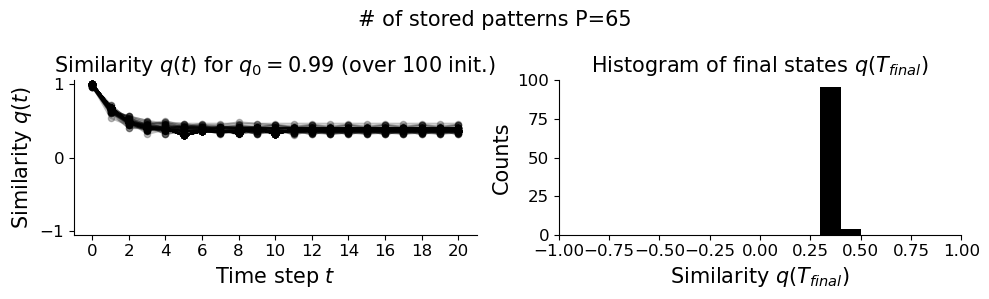

In [ ]:
for P in range(10, 100):
    memories = generate_memories(P, network_size)
    M = compute_synaptic_weights(memories)
    repeat = 100  # we will recover the first memory from `repeat` initial conditions
    simulation_length = 20  # number of synchronous updates performed
    target_memory = memories[0, :]
    
    plot_similarity_dynamics(
        target_memory=target_memory,
        M=M,
        number_of_stored_patterns=P,
        q_0=0.99,
        simulation_length=simulation_length,
        repeat=repeat, 
        save_plot=True
    )